## Local Distances

In [1]:
import sys 
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

FIt-SNE repository not detected. Functionality will be disabled.


In [2]:
# read in Macosko retina data
retina = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.processed.norowlabels.tsv.gz', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
# read in Herring colon data
colon = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq.processed.norowlabels.tsv.gz', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')

In [3]:
# look at dimensions of counts matrix (cells, genes)
retina.data.shape

(1326, 500)

In [4]:
# look at dimensions of counts matrix (cells, genes)
colon.data.shape

(1117, 500)

In [5]:
# create dictionaries for dumping results into
final_distance_stats = {'Retina':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}, 'Colon':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}}

In [6]:
# choose value for K-nearest neighbor calculations. We use 30 because that is the standard perplexity chosen for DR techniques here.
k = 30

---

In [7]:
retina.barcode_counts()

0.0    309
1.0    281
2.0    258
3.0    130
4.0     94
5.0     89
6.0     77
7.0     49
8.0     39
Name: Barcode, dtype: int64

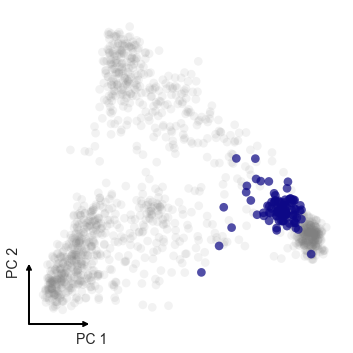

In [8]:
retina_PCA2 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=2)
retina_PCA2.plot_barcodes(ranks=['4']) # cones

In [9]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_PCA2.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_PCA2.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (2)'], final_distance_stats['Retina']['EMD']['PCA (2)'], final_distance_stats['Retina']['KLD']['PCA (2)'], final_distance_stats['Retina']['Knn Pres.']['PCA (2)'] = mantel_stats[0], EMD, KLD, knn

R: 0.4003
EMD: 0.311
KLD: 0.3047
Knn Pres.: 60.163
CPU times: user 311 ms, sys: 24.7 ms, total: 336 ms
Wall time: 284 ms


CPU times: user 18.4 s, sys: 509 ms, total: 18.9 s
Wall time: 18.7 s


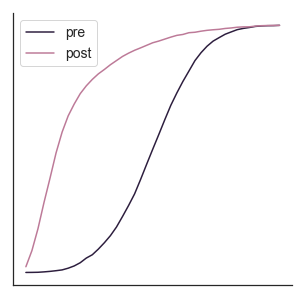

<Figure size 504x504 with 0 Axes>

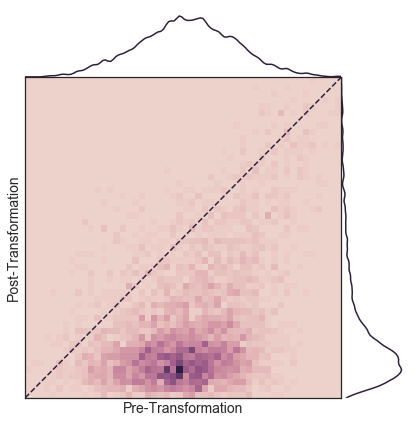

In [10]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

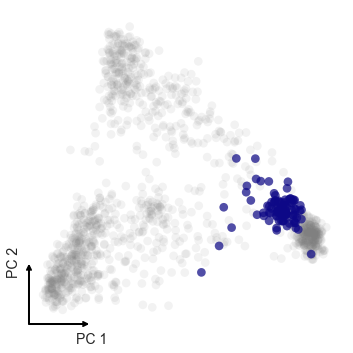

In [11]:
retina_PCA10 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=10)
retina_PCA10.plot_barcodes(ranks=['4']) # cones

In [12]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_PCA10.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_PCA10.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (10)'], final_distance_stats['Retina']['EMD']['PCA (10)'], final_distance_stats['Retina']['KLD']['PCA (10)'], final_distance_stats['Retina']['Knn Pres.']['PCA (10)'] = mantel_stats[0], EMD, KLD, knn

R: 0.4781
EMD: 0.1503
KLD: 0.1123
Knn Pres.: 65.5048
CPU times: user 302 ms, sys: 18.3 ms, total: 320 ms
Wall time: 297 ms


CPU times: user 17.8 s, sys: 359 ms, total: 18.2 s
Wall time: 17.5 s


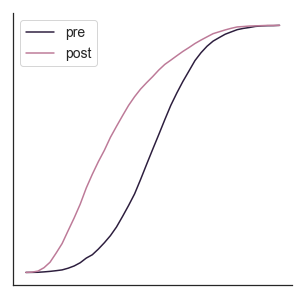

<Figure size 504x504 with 0 Axes>

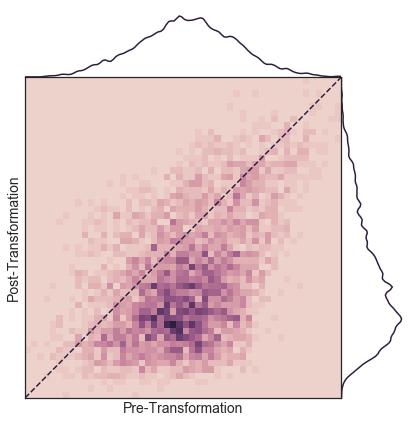

In [13]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA10_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA10_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

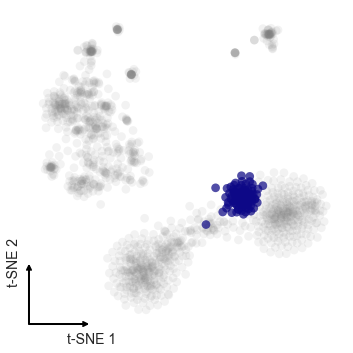

In [14]:
retina_tSNE = DR.from_file('pymethods_out/retina_tSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_tSNE.plot_barcodes(ranks=['4']) # cones

In [15]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_tSNE.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_tSNE.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE'], final_distance_stats['Retina']['EMD']['t-SNE'], final_distance_stats['Retina']['KLD']['t-SNE'], final_distance_stats['Retina']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.3688
EMD: 0.2843
KLD: 0.1463
Knn Pres.: 66.2743
CPU times: user 304 ms, sys: 21.1 ms, total: 325 ms
Wall time: 284 ms


CPU times: user 17.6 s, sys: 327 ms, total: 18 s
Wall time: 17.3 s


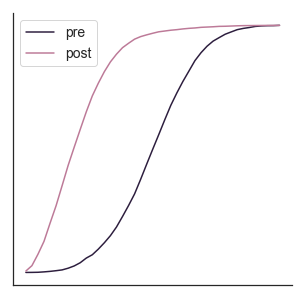

<Figure size 504x504 with 0 Axes>

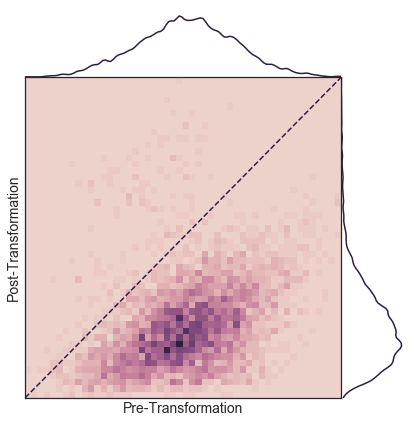

In [16]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

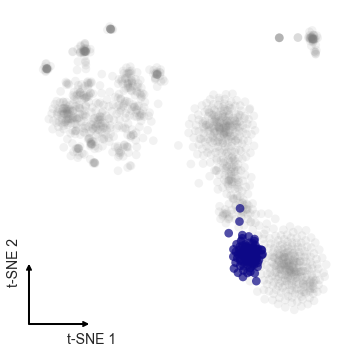

In [17]:
retina_FItSNE = DR.from_file('pymethods_out/retina_FItSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_FItSNE.plot_barcodes(ranks=['4']) # rods & cones

In [18]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_FItSNE.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_FItSNE.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['FIt-SNE'], final_distance_stats['Retina']['EMD']['FIt-SNE'], final_distance_stats['Retina']['KLD']['FIt-SNE'], final_distance_stats['Retina']['Knn Pres.']['FIt-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.3572
EMD: 0.2908
KLD: 0.1563
Knn Pres.: 66.5912
CPU times: user 296 ms, sys: 20.2 ms, total: 316 ms
Wall time: 289 ms


CPU times: user 17.8 s, sys: 359 ms, total: 18.2 s
Wall time: 17.5 s


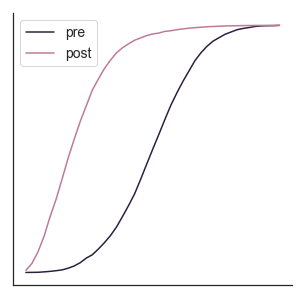

<Figure size 504x504 with 0 Axes>

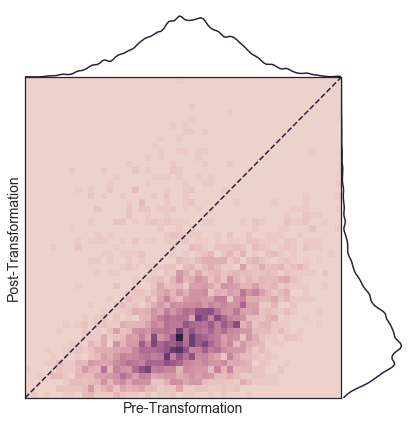

In [19]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_FItSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_FItSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

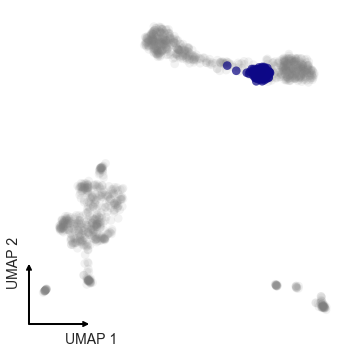

In [20]:
retina_UMAP = DR.from_file('pymethods_out/retina_UMAP.csv', name='UMAP', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_UMAP.plot_barcodes(ranks=['4']) # rods & cones

In [21]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_UMAP.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_UMAP.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP'], final_distance_stats['Retina']['EMD']['UMAP'], final_distance_stats['Retina']['KLD']['UMAP'], final_distance_stats['Retina']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, KLD, knn

R: -0.0107
EMD: 0.3229
KLD: 0.2755
Knn Pres.: 58.6464
CPU times: user 305 ms, sys: 23.8 ms, total: 329 ms
Wall time: 288 ms


CPU times: user 17.5 s, sys: 313 ms, total: 17.8 s
Wall time: 17.1 s


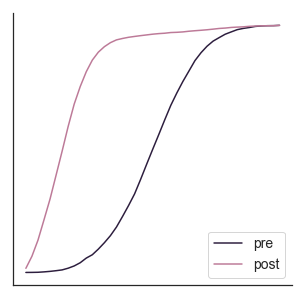

<Figure size 504x504 with 0 Axes>

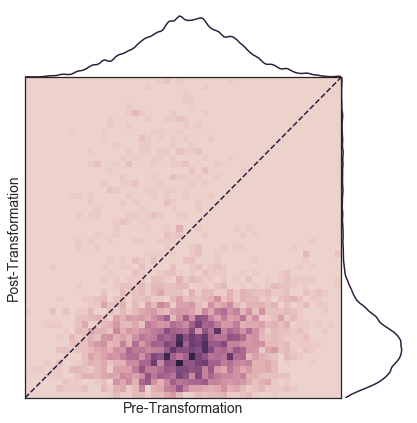

In [22]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

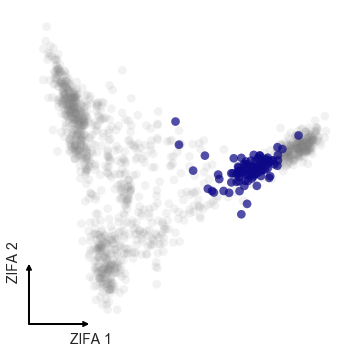

In [23]:
retina_ZIFA = DR.from_file('pymethods_out/retina_ZIFA.csv', name='ZIFA', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_ZIFA.plot_barcodes(ranks=['4']) # rods & cones

In [24]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='log2'), post=retina_ZIFA.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='log2', ranks=['4']), post=retina_ZIFA.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZIFA'], final_distance_stats['Retina']['EMD']['ZIFA'], final_distance_stats['Retina']['KLD']['ZIFA'], final_distance_stats['Retina']['Knn Pres.']['ZIFA'] = mantel_stats[0], EMD, KLD, knn

R: 0.4366
EMD: 0.0323
KLD: 0.2647
Knn Pres.: 62.766
CPU times: user 289 ms, sys: 23.1 ms, total: 312 ms
Wall time: 271 ms


CPU times: user 17.7 s, sys: 369 ms, total: 18 s
Wall time: 17.4 s


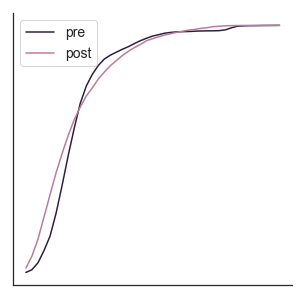

<Figure size 504x504 with 0 Axes>

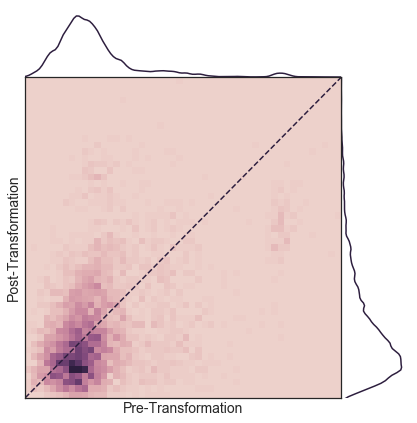

In [25]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

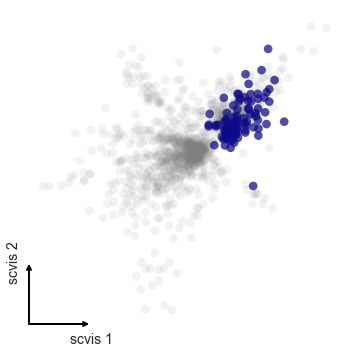

In [26]:
retina_scvis = DR.from_file('scvis_out/retina/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='pymethods_out/retina_clu.csv')
retina_scvis.plot_barcodes(ranks=['4']) # rods & cones

In [27]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_scvis.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_scvis.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scvis'], final_distance_stats['Retina']['EMD']['scvis'], final_distance_stats['Retina']['KLD']['scvis'], final_distance_stats['Retina']['Knn Pres.']['scvis'] = mantel_stats[0], EMD, KLD, knn

R: 0.9088
EMD: 0.0129
KLD: 0.0532
Knn Pres.: 89.407
CPU times: user 287 ms, sys: 17.7 ms, total: 305 ms
Wall time: 265 ms


CPU times: user 17.3 s, sys: 330 ms, total: 17.7 s
Wall time: 17 s


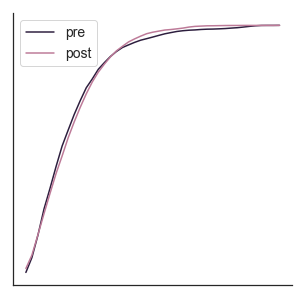

<Figure size 504x504 with 0 Axes>

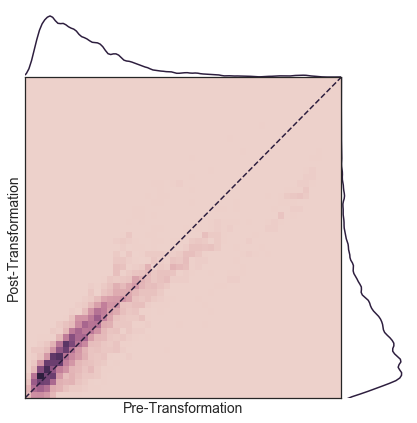

In [28]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

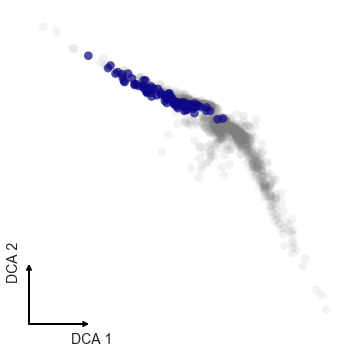

In [29]:
retina_DCA = DR.from_file('pymethods_out/retina_DCA.csv', name='DCA', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_DCA.plot_barcodes(ranks=['4']) # rods & cones

In [30]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_DCA.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_DCA.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['DCA'], final_distance_stats['Retina']['EMD']['DCA'], final_distance_stats['Retina']['KLD']['DCA'], final_distance_stats['Retina']['Knn Pres.']['DCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.7993
EMD: 0.0337
KLD: 0.1484
Knn Pres.: 78.3386
CPU times: user 304 ms, sys: 22.9 ms, total: 327 ms
Wall time: 268 ms


CPU times: user 17.5 s, sys: 347 ms, total: 17.9 s
Wall time: 17.3 s


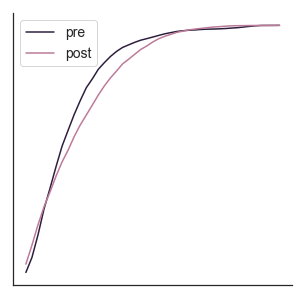

<Figure size 504x504 with 0 Axes>

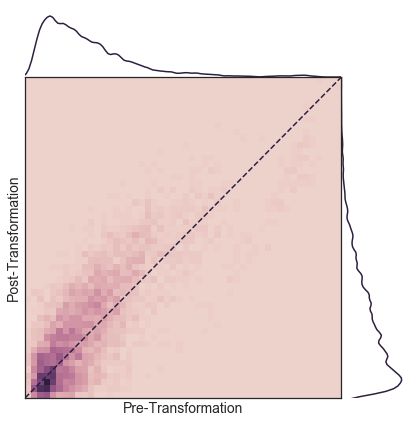

In [31]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

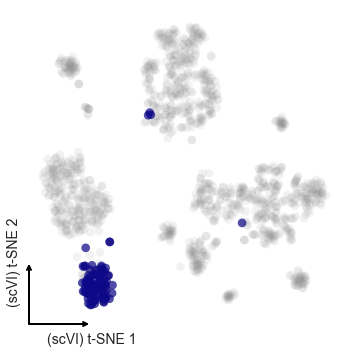

In [32]:
retina_scVI = DR.from_file('pymethods_out/retina_scVI.csv', name='scVI', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_scVI_tSNE = DR.from_file('pymethods_out/retina_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_scVI_tSNE.plot_barcodes(ranks=['4']) # rods & cones

In [33]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_scVI.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_scVI.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scVI'], final_distance_stats['Retina']['EMD']['scVI'], final_distance_stats['Retina']['KLD']['scVI'], final_distance_stats['Retina']['Knn Pres.']['scVI'] = mantel_stats[0], EMD, KLD, knn

R: 0.2022
EMD: 0.2139
KLD: 0.2792
Knn Pres.: 60.4799
CPU times: user 280 ms, sys: 18.3 ms, total: 298 ms
Wall time: 247 ms


CPU times: user 17.9 s, sys: 395 ms, total: 18.3 s
Wall time: 18.4 s


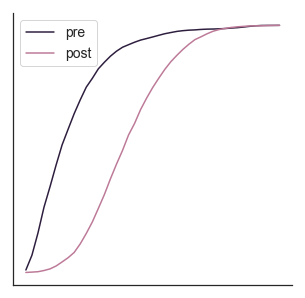

<Figure size 504x504 with 0 Axes>

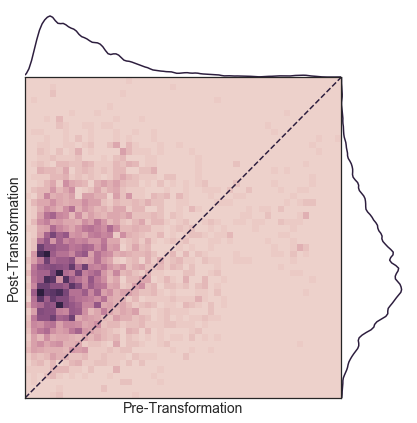

In [34]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

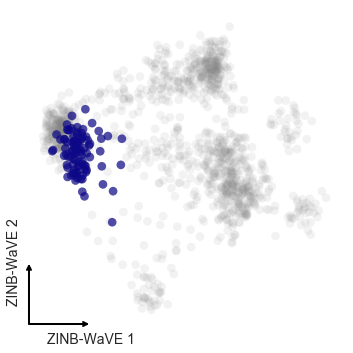

In [35]:
retina_ZINBWAVE = DR.from_file('Rmethods_out/retina_ZINB-WAVE.csv', name='ZINB-WaVE', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_ZINBWAVE.plot_barcodes(ranks=['4']) # cones
retina_ZINBWAVE.plot_barcodes(ranks=['4'], figsize=(4,4), save_to='../images/cones_ZINBWAVE.png')

In [36]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_ZINBWAVE.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_ZINBWAVE.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZINB-WaVE'], final_distance_stats['Retina']['EMD']['ZINB-WaVE'], final_distance_stats['Retina']['KLD']['ZINB-WaVE'], final_distance_stats['Retina']['Knn Pres.']['ZINB-WaVE'] = mantel_stats[0], EMD, KLD, knn

R: 0.2119
EMD: 0.0439
KLD: 0.3754
Knn Pres.: 59.7103
CPU times: user 309 ms, sys: 23.8 ms, total: 332 ms
Wall time: 248 ms


CPU times: user 17.4 s, sys: 329 ms, total: 17.7 s
Wall time: 17 s


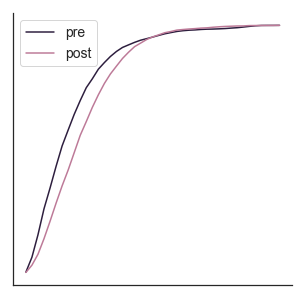

<Figure size 504x504 with 0 Axes>

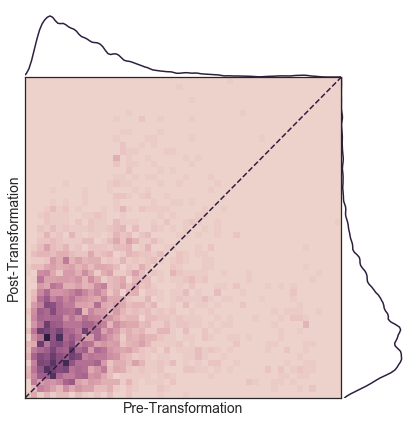

In [37]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

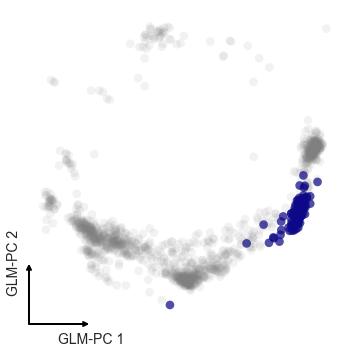

In [38]:
retina_GLMPCA = DR.from_file('Rmethods_out/retina_GLM-PCA.csv', name='GLM-PC', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_GLMPCA.plot_barcodes(ranks=['4']) # rods & cones

In [39]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_GLMPCA.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_GLMPCA.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['GLM-PCA'], final_distance_stats['Retina']['EMD']['GLM-PCA'], final_distance_stats['Retina']['KLD']['GLM-PCA'], final_distance_stats['Retina']['Knn Pres.']['GLM-PCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.256
EMD: 0.0811
KLD: 0.4764
Knn Pres.: 59.2123
CPU times: user 288 ms, sys: 18.3 ms, total: 306 ms
Wall time: 251 ms


CPU times: user 17.5 s, sys: 364 ms, total: 17.8 s
Wall time: 17.2 s


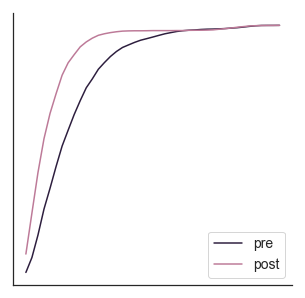

<Figure size 504x504 with 0 Axes>

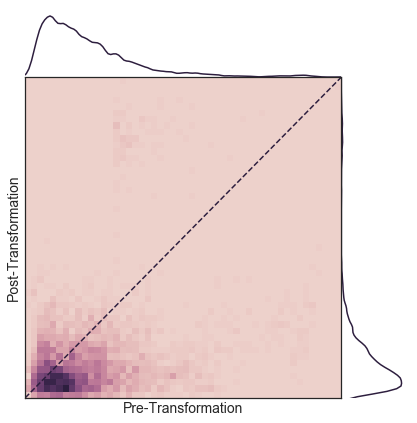

In [40]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

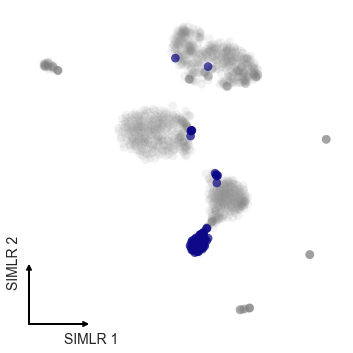

In [41]:
retina_SIMLR = DR.from_file('Rmethods_out/retina_SIMLR_F.csv', name='SIMLR', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_SIMLR.plot_barcodes(ranks=['4']) # rods & cones

In [42]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_SIMLR.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_SIMLR.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['SIMLR'], final_distance_stats['Retina']['EMD']['SIMLR'], final_distance_stats['Retina']['KLD']['SIMLR'], final_distance_stats['Retina']['Knn Pres.']['SIMLR'] = mantel_stats[0], EMD, KLD, knn

R: 0.2534
EMD: 0.3539
KLD: 0.8436
Knn Pres.: 74.1512
CPU times: user 323 ms, sys: 23.9 ms, total: 347 ms
Wall time: 290 ms


CPU times: user 17.9 s, sys: 367 ms, total: 18.2 s
Wall time: 17.5 s


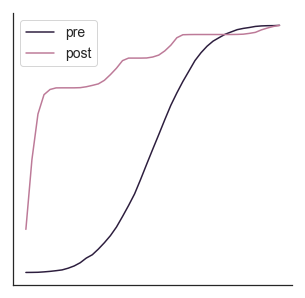

<Figure size 504x504 with 0 Axes>

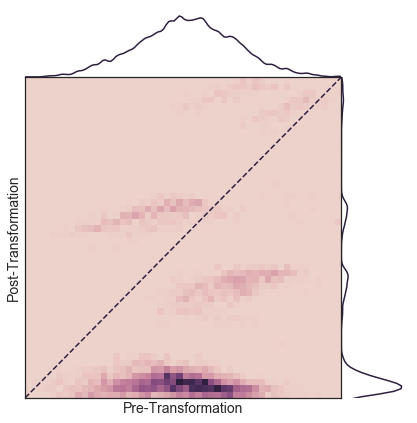

In [43]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
# Colon

In [44]:
colon.barcode_counts()

0.0    274
1.0    273
2.0    167
3.0    140
4.0    135
5.0    128
Name: Barcode, dtype: int64

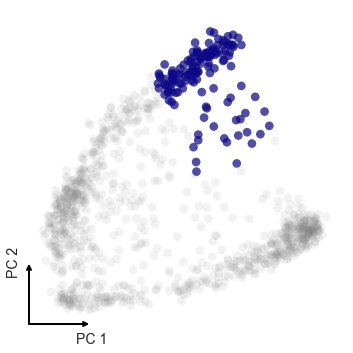

In [45]:
colon_PCA2 = fcc_PCA(matrix=colon.arcsinh_norm(), barcodes=colon.barcodes, n_components=2)
colon_PCA2.plot_barcodes(ranks=['3']) # mature goblet cells

In [46]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_PCA2.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_PCA2.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA (2)'], final_distance_stats['Colon']['EMD']['PCA (2)'], final_distance_stats['Colon']['KLD']['PCA (2)'], final_distance_stats['Colon']['Knn Pres.']['PCA (2)'] = mantel_stats[0], EMD, KLD, knn

R: 0.684
EMD: 0.0854
KLD: 0.1405
Knn Pres.: 81.6122
CPU times: user 423 ms, sys: 32 ms, total: 455 ms
Wall time: 439 ms


CPU times: user 18.4 s, sys: 446 ms, total: 18.9 s
Wall time: 18.4 s


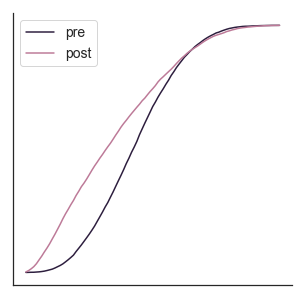

<Figure size 504x504 with 0 Axes>

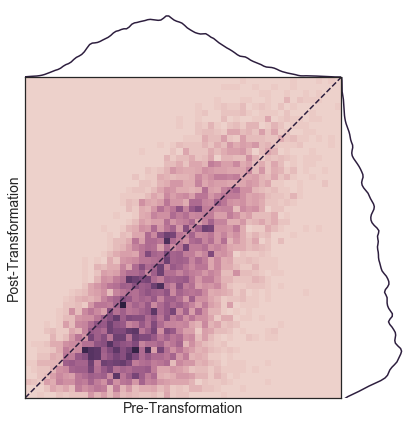

In [47]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

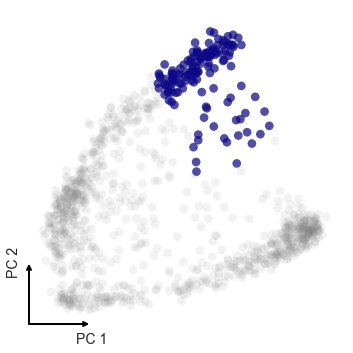

In [48]:
colon_PCA10 = fcc_PCA(matrix=colon.arcsinh_norm(), barcodes=colon.barcodes, n_components=10)
colon_PCA10.plot_barcodes(ranks=['3']) # mature goblet cells

In [49]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_PCA10.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_PCA10.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA (10)'], final_distance_stats['Colon']['EMD']['PCA (10)'], final_distance_stats['Colon']['KLD']['PCA (10)'], final_distance_stats['Colon']['Knn Pres.']['PCA (10)'] = mantel_stats[0], EMD, KLD, knn

R: 0.7963
EMD: 0.0423
KLD: 0.0432
Knn Pres.: 84.1939
CPU times: user 422 ms, sys: 26.2 ms, total: 448 ms
Wall time: 405 ms


CPU times: user 18.1 s, sys: 429 ms, total: 18.6 s
Wall time: 18 s


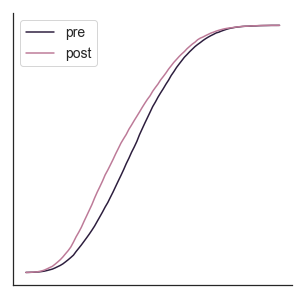

<Figure size 504x504 with 0 Axes>

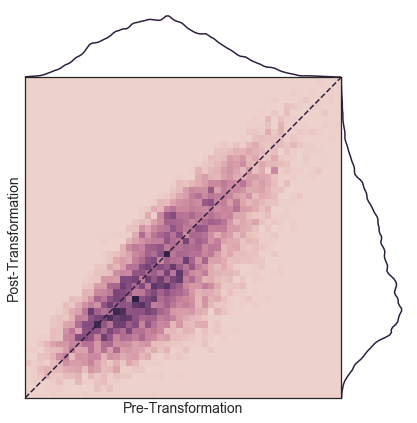

In [50]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA10_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA10_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

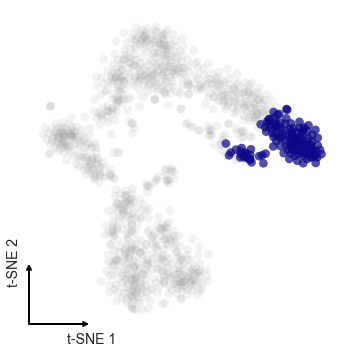

In [51]:
colon_tSNE = DR.from_file('pymethods_out/colon_tSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_tSNE.plot_barcodes(ranks=['3']) # mature goblet cells

In [52]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_tSNE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_tSNE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE'], final_distance_stats['Colon']['EMD']['t-SNE'], final_distance_stats['Colon']['KLD']['t-SNE'], final_distance_stats['Colon']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.6834
EMD: 0.0792
KLD: 0.1062
Knn Pres.: 82.949
CPU times: user 451 ms, sys: 24.7 ms, total: 476 ms
Wall time: 425 ms


CPU times: user 18.2 s, sys: 357 ms, total: 18.6 s
Wall time: 18 s


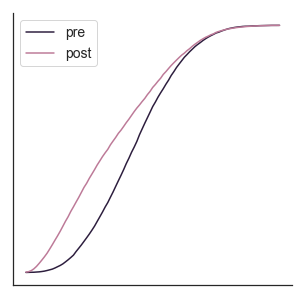

<Figure size 504x504 with 0 Axes>

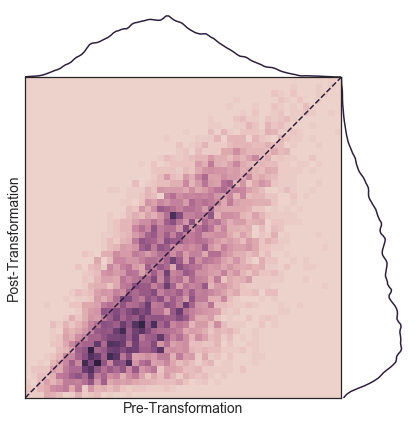

In [53]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

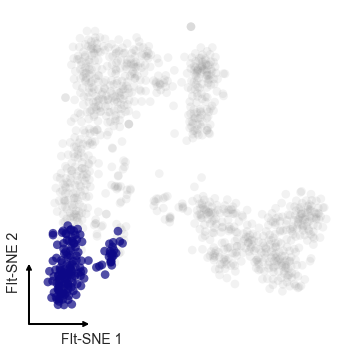

In [54]:
colon_FItSNE = DR.from_file('pymethods_out/colon_FItSNE.csv', name='FIt-SNE', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_FItSNE.plot_barcodes(ranks=['3']) # mature goblet cells

In [55]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_FItSNE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_FItSNE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['FIt-SNE'], final_distance_stats['Colon']['EMD']['FIt-SNE'], final_distance_stats['Colon']['KLD']['FIt-SNE'], final_distance_stats['Colon']['Knn Pres.']['FIt-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.6634
EMD: 0.0877
KLD: 0.1198
Knn Pres.: 82.6633
CPU times: user 394 ms, sys: 22.3 ms, total: 416 ms
Wall time: 384 ms


CPU times: user 18.4 s, sys: 460 ms, total: 18.8 s
Wall time: 18.3 s


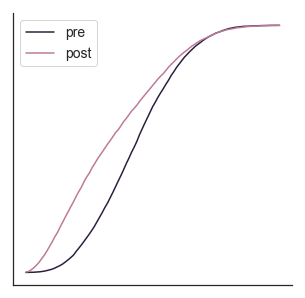

<Figure size 504x504 with 0 Axes>

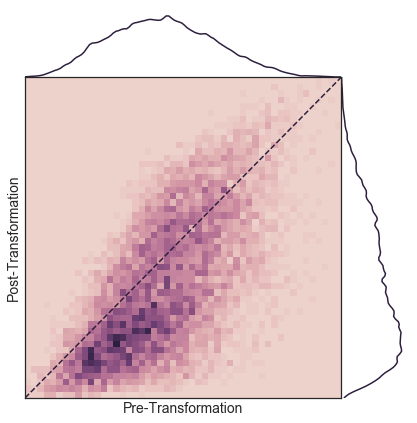

In [56]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_FItSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_FItSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

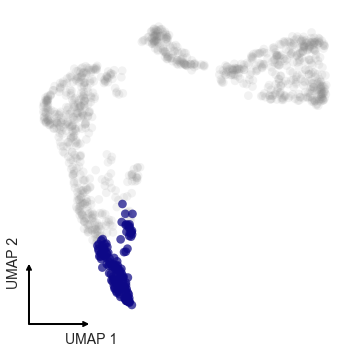

In [57]:
colon_UMAP = DR.from_file('pymethods_out/colon_UMAP.csv', name='UMAP', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_UMAP.plot_barcodes(ranks=['3']) # rods & cones

In [58]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_UMAP.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_UMAP.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP'], final_distance_stats['Colon']['EMD']['UMAP'], final_distance_stats['Colon']['KLD']['UMAP'], final_distance_stats['Colon']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, KLD, knn

R: 0.5708
EMD: 0.1174
KLD: 0.1785
Knn Pres.: 79.398
CPU times: user 406 ms, sys: 24.9 ms, total: 431 ms
Wall time: 384 ms


CPU times: user 17.9 s, sys: 360 ms, total: 18.3 s
Wall time: 17.6 s


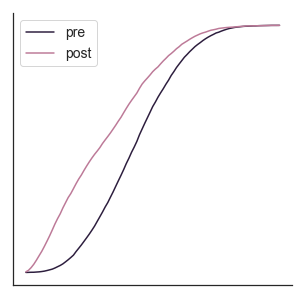

<Figure size 504x504 with 0 Axes>

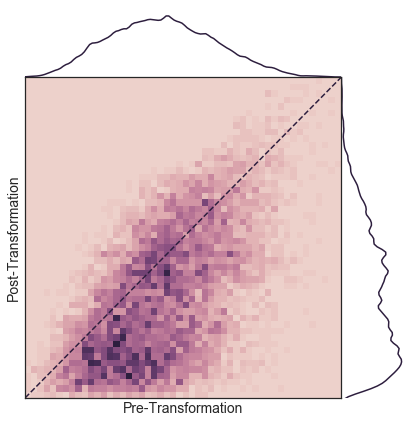

In [59]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

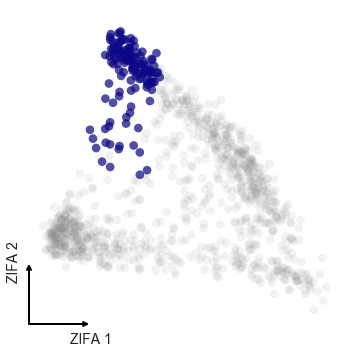

In [60]:
colon_ZIFA = DR.from_file('pymethods_out/colon_ZIFA.csv', name='ZIFA', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_ZIFA.plot_barcodes(ranks=['3']) # mature goblet cells

In [61]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='log2'), post=colon_ZIFA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='log2', ranks=['3']), post=colon_ZIFA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZIFA'], final_distance_stats['Colon']['EMD']['ZIFA'], final_distance_stats['Colon']['KLD']['ZIFA'], final_distance_stats['Colon']['Knn Pres.']['ZIFA'] = mantel_stats[0], EMD, KLD, knn

R: 0.562
EMD: 0.0523
KLD: 0.2226
Knn Pres.: 76.2755
CPU times: user 384 ms, sys: 24.5 ms, total: 409 ms
Wall time: 363 ms


CPU times: user 17.9 s, sys: 339 ms, total: 18.3 s
Wall time: 17.6 s


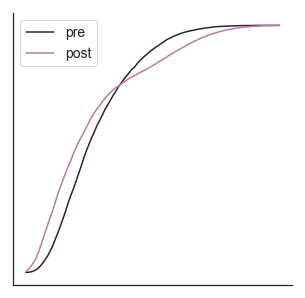

<Figure size 504x504 with 0 Axes>

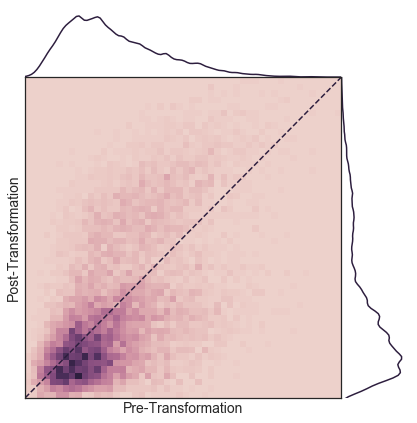

In [62]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

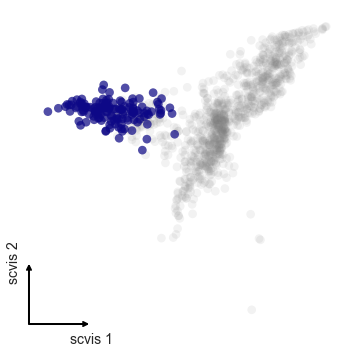

In [63]:
colon_scvis = DR.from_file('scvis_out/colon/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='pymethods_out/colon_clu.csv')
colon_scvis.plot_barcodes(ranks=['3']) # mature goblet cells

In [64]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_scvis.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_scvis.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scvis'], final_distance_stats['Colon']['EMD']['scvis'], final_distance_stats['Colon']['KLD']['scvis'], final_distance_stats['Colon']['Knn Pres.']['scvis'] = mantel_stats[0], EMD, KLD, knn

R: 0.8749
EMD: 0.0128
KLD: 0.0598
Knn Pres.: 93.7041
CPU times: user 447 ms, sys: 19.4 ms, total: 467 ms
Wall time: 435 ms


CPU times: user 17.9 s, sys: 326 ms, total: 18.2 s
Wall time: 17.9 s


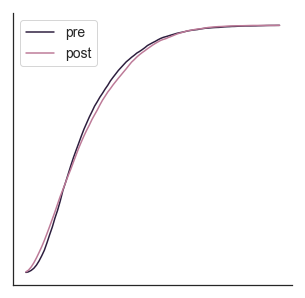

<Figure size 504x504 with 0 Axes>

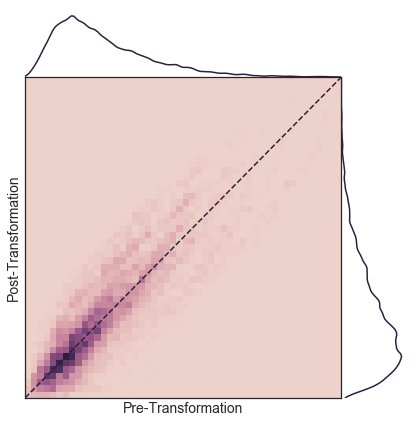

In [65]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

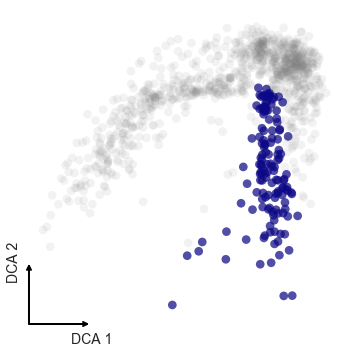

In [66]:
colon_DCA = DR.from_file('pymethods_out/colon_DCA.csv', name='DCA', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_DCA.plot_barcodes(ranks=['3']) # mature goblet cells
colon_DCA.plot_barcodes(ranks=['3'], figsize=(4,4), save_to='../images/goblet_DCA.png')

In [67]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_DCA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_DCA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['DCA'], final_distance_stats['Colon']['EMD']['DCA'], final_distance_stats['Colon']['KLD']['DCA'], final_distance_stats['Colon']['Knn Pres.']['DCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.4702
EMD: 0.0355
KLD: 0.2583
Knn Pres.: 72.7755
CPU times: user 378 ms, sys: 24.8 ms, total: 403 ms
Wall time: 320 ms


CPU times: user 17.4 s, sys: 311 ms, total: 17.7 s
Wall time: 17 s


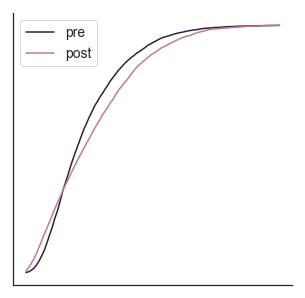

<Figure size 504x504 with 0 Axes>

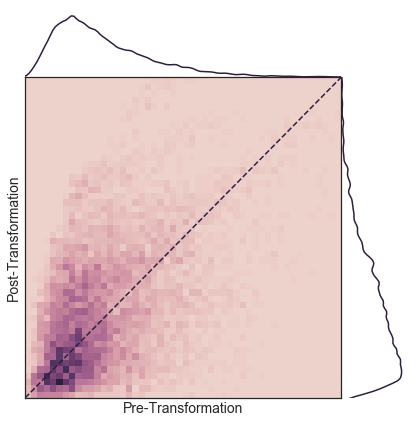

In [68]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

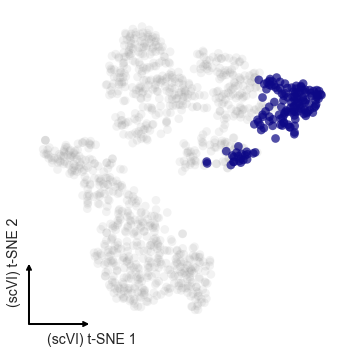

In [69]:
colon_scVI = DR.from_file('pymethods_out/colon_scVI.csv', name='scVI', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_scVI_tSNE = DR.from_file('pymethods_out/colon_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_scVI_tSNE.plot_barcodes(ranks=['3']) # rods & cones

In [70]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_scVI.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_scVI.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scVI'], final_distance_stats['Colon']['EMD']['scVI'], final_distance_stats['Colon']['KLD']['scVI'], final_distance_stats['Colon']['Knn Pres.']['scVI'] = mantel_stats[0], EMD, KLD, knn

R: 0.1941
EMD: 0.1594
KLD: 0.224
Knn Pres.: 69.3367
CPU times: user 349 ms, sys: 20.2 ms, total: 369 ms
Wall time: 317 ms


CPU times: user 17.4 s, sys: 318 ms, total: 17.8 s
Wall time: 17 s


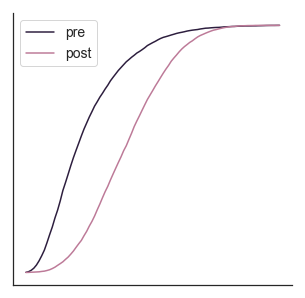

<Figure size 504x504 with 0 Axes>

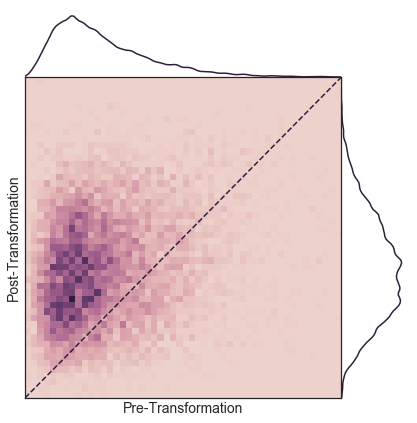

In [71]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

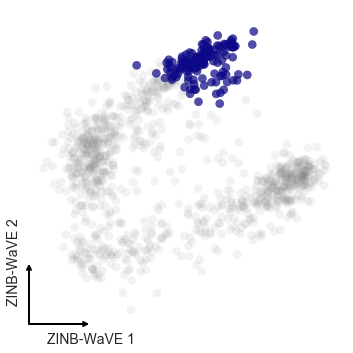

In [72]:
colon_ZINBWAVE = DR.from_file('Rmethods_out/colon_ZINB-WAVE.csv', name='ZINB-WaVE', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')
colon_ZINBWAVE.plot_barcodes(ranks=['3']) # mature goblet cells

In [73]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_ZINBWAVE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_ZINBWAVE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZINB-WaVE'], final_distance_stats['Colon']['EMD']['ZINB-WaVE'], final_distance_stats['Colon']['KLD']['ZINB-WaVE'], final_distance_stats['Colon']['Knn Pres.']['ZINB-WaVE'] = mantel_stats[0], EMD, KLD, knn

R: 0.2903
EMD: 0.0199
KLD: 0.2771
Knn Pres.: 70.1531
CPU times: user 352 ms, sys: 18.8 ms, total: 370 ms
Wall time: 322 ms


CPU times: user 17.4 s, sys: 325 ms, total: 17.7 s
Wall time: 17 s


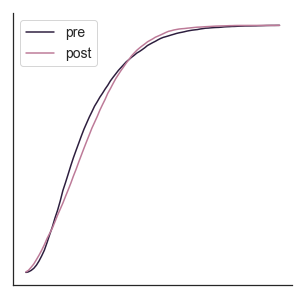

<Figure size 504x504 with 0 Axes>

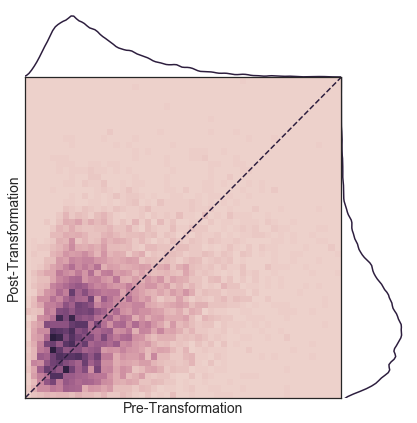

In [74]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

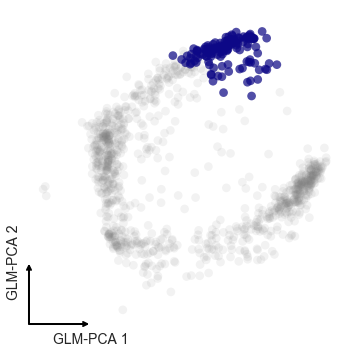

In [75]:
colon_GLMPCA = DR.from_file('Rmethods_out/colon_GLM-PCA.csv', name='GLM-PCA', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')
colon_GLMPCA.plot_barcodes(ranks=['3']) # mature goblet cells

In [76]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_GLMPCA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_GLMPCA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['GLM-PCA'], final_distance_stats['Colon']['EMD']['GLM-PCA'], final_distance_stats['Colon']['KLD']['GLM-PCA'], final_distance_stats['Colon']['Knn Pres.']['GLM-PCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.1685
EMD: 0.0237
KLD: 0.351
Knn Pres.: 69.0918
CPU times: user 347 ms, sys: 17.8 ms, total: 365 ms
Wall time: 315 ms


CPU times: user 17.4 s, sys: 312 ms, total: 17.7 s
Wall time: 17 s


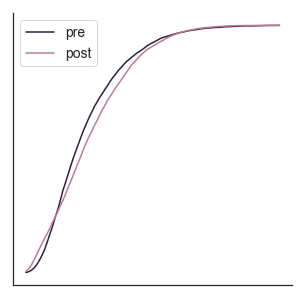

<Figure size 504x504 with 0 Axes>

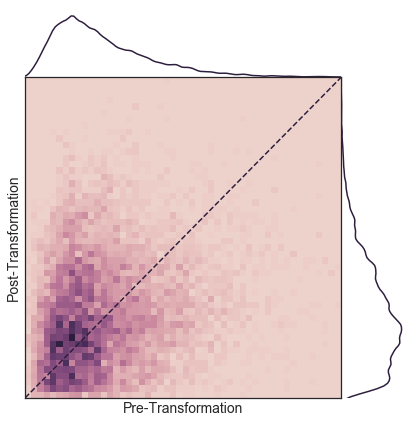

In [77]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

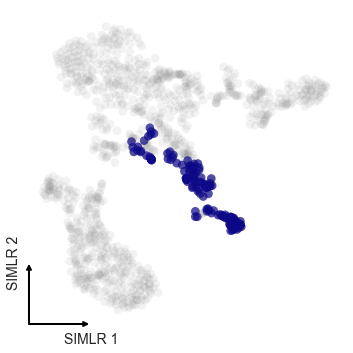

In [78]:
colon_SIMLR = DR.from_file('Rmethods_out/colon_SIMLR_F.csv', name='SIMLR', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')
colon_SIMLR.plot_barcodes(ranks=['3']) # mature goblet cells

In [79]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_SIMLR.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_SIMLR.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['SIMLR'], final_distance_stats['Colon']['EMD']['SIMLR'], final_distance_stats['Colon']['KLD']['SIMLR'], final_distance_stats['Colon']['Knn Pres.']['SIMLR'] = mantel_stats[0], EMD, KLD, knn

R: 0.3658
EMD: 0.1031
KLD: 0.2638
Knn Pres.: 82.2551
CPU times: user 388 ms, sys: 24.8 ms, total: 412 ms
Wall time: 358 ms


CPU times: user 17.7 s, sys: 305 ms, total: 18 s
Wall time: 17.3 s


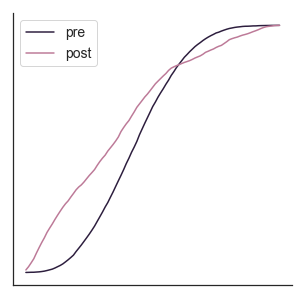

<Figure size 504x504 with 0 Axes>

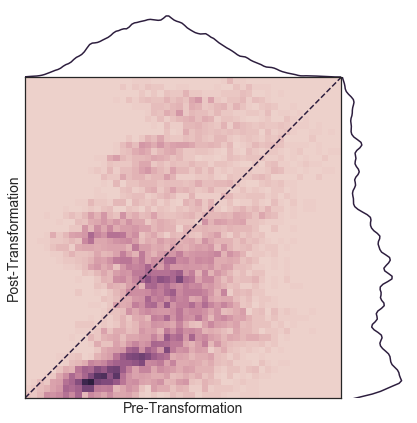

In [80]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
### Summary Metrics

In [81]:
retina_sum = pd.DataFrame(final_distance_stats['Retina'])
retina_sum = retina_sum.sort_values(by='R')
retina_sum = retina_sum.reindex(['EMD','KLD','R','Knn Pres.'], axis=1)
retina_sum.to_csv('retina_local_metrics.csv')

In [82]:
retina_sum = retina_sum.drop('KLD', axis=1) # dropping KL divergence

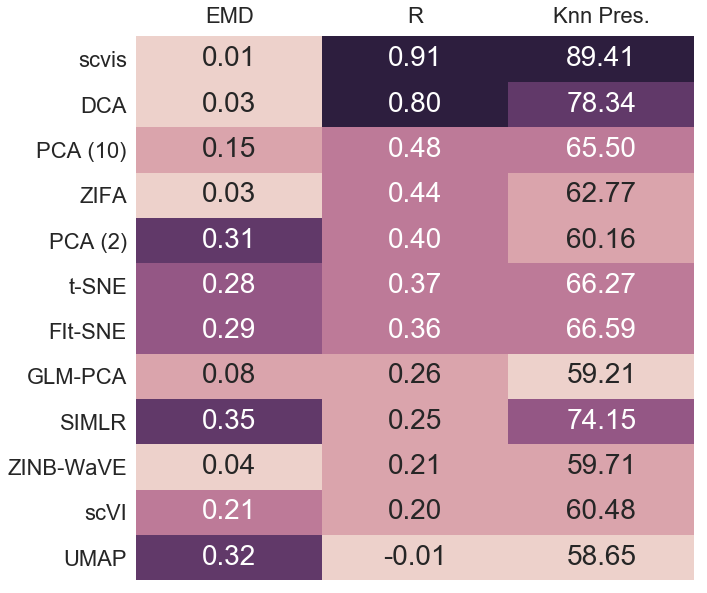

In [83]:
retina_norm=(retina_sum-retina_sum.mean())/retina_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(retina_norm, annot=retina_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
plt.savefig(fname='../images/retina_local_metrics.png', transparent=True, bbox_inches='tight')

In [84]:
colon_sum = pd.DataFrame(final_distance_stats['Colon'])
colon_sum = colon_sum.sort_values(by='R')
colon_sum = colon_sum.reindex(['EMD','KLD','R','Knn Pres.'], axis=1)
colon_sum.to_csv('colon_local_metrics.csv')

In [85]:
colon_sum = colon_sum.drop('KLD', axis=1) # dropping KL divergence

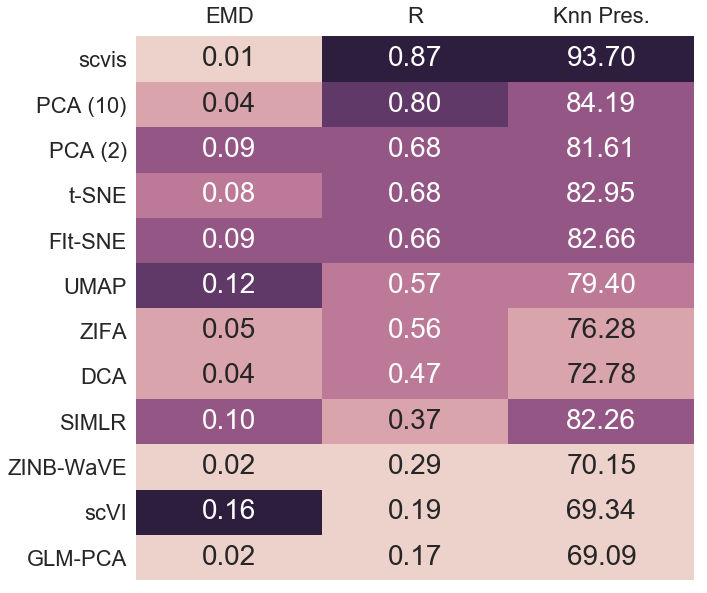

In [86]:
colon_norm=(colon_sum-colon_sum.mean())/colon_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(colon_norm, annot=colon_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
plt.savefig(fname='../images/colon_local_metrics.png', transparent=True, bbox_inches='tight')